# Exam: January 5th, 2023

## Course: 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

### Instructions:
1. Complete the problems by following instructions.
2. Submit this notebook with your solutions saved.
3. This exam has 3 problems for a total of 40 points, and you need 20 points to pass.
4. Be clear with reasoning and comment your code.
5. Follow the rules: no external communication or unauthorized tools.
6. Good luck!

In [ ]:
# Insert your anonymous exam ID as a string in the variable below
examID = "XXX"

## Problem 1: Markov Chain (Maximum Points: 14)

A courier company operates a fleet of delivery trucks divided into three regions: downtown, suburbs, and countryside. The probabilities of transitioning between regions are as follows:

| Current Region | Downtown | Suburbs | Countryside |
|----------------|----------|---------|-------------|
| Downtown       | 0.3      | 0.4     | 0.3         |
| Suburbs        | 0.2      | 0.5     | 0.3         |
| Countryside    | 0.4      | 0.3     | 0.3         |


### Questions:
1. If a truck is currently in the suburbs, what is the probability that it will    be in the downtown region after two time steps? [2p]
2. If a truck is currently in the suburbs, what is the probability that it will    be in the downtown region for the first time after two time steps? [2p]
3. Is this Markov chain irreducible? Explain your answer. [3p]
4. What is the stationary distribution? [3p]
5. What is the expected number of steps until the first time one enters the suburbs    having started in the downtown region? [4p]


In [1]:
# Problem 1 Solutions:

import numpy as np

# Transition matrix: [Downtown, Suburbs, Countryside]
P = np.array([
    [0.3, 0.4, 0.3],
    [0.2, 0.5, 0.3],
    [0.4, 0.3, 0.3]
])

# Part 1: Probability in downtown after 2 steps, starting from suburbs
v0 = np.array([0, 1, 0])
v2 = v0 @ np.linalg.matrix_power(P, 2)
problem1_p1 = v2[0]

# Part 2: Probability first time in downtown at step 2, starting from suburbs
# Must not be in downtown at step 1, but in downtown at step 2
# P(suburbs->suburbs->downtown) + P(suburbs->countryside->downtown)
p_sub_sub_down = P[1,1] * P[1,0]
p_sub_coun_down = P[1,2] * P[2,0]
problem1_p2 = p_sub_sub_down + p_sub_coun_down

# Part 3: Is the chain irreducible?
problem1_irreducible = True  # All states communicate

# Part 4: Stationary distribution
A = np.transpose(P) - np.eye(3)
A = np.vstack([A, np.ones(3)])
b = np.zeros(4)
b[3] = 1
stationary = np.linalg.lstsq(A, b, rcond=None)[0]
problem1_stationary = stationary.tolist()

# Part 5: Expected steps to suburbs from downtown (hitting time)
# Let E[i] = expected steps from state i to suburbs
# E[1] = 0 (already in suburbs)
# E[0] = 1 + 0.3*E[0] + 0.3*E[2]
# E[2] = 1 + 0.4*E[0] + 0.3*E[2]
# Rearranged:
# E[0] - 0.3*E[0] - 0.3*E[2] = 1
# E[2] - 0.3*E[2] - 0.4*E[0] = 1
# 0.7*E[0] - 0.3*E[2] = 1
# -0.4*E[0] + 0.7*E[2] = 1

A_ET = np.array([
    [0.7, -0.3],
    [-0.4, 0.7]
])
b_ET = np.array([1, 1])
E0, E2 = np.linalg.solve(A_ET, b_ET)
problem1_ET = E0

# Print or assign as needed:
# problem1_p1, problem1_p2, problem1_irreducible, problem1_stationary, problem1_ET

## Problem 2: Linear Regression with Abalone Dataset (Maximum Points: 13)

You are tasked to predict the age of abalone based on physical measurements using the `data/abalone.csv` dataset.

### Questions:
1. Load the dataset into a pandas dataframe. Identify features and target. [2p]
2. Split the data into train and test sets. [2p]
3. Train a linear regression model. [1p]
4. Evaluate the model with Mean Absolute Error (MAE) and plot the Empirical Distribution    Function (EDF) with confidence bands. [3p]
5. Provide a scatter plot comparing predicted and true values. [2p]
6. Reason about model performance. [3p]


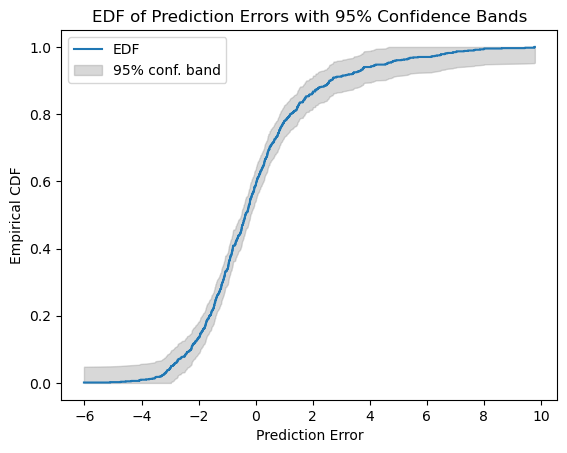

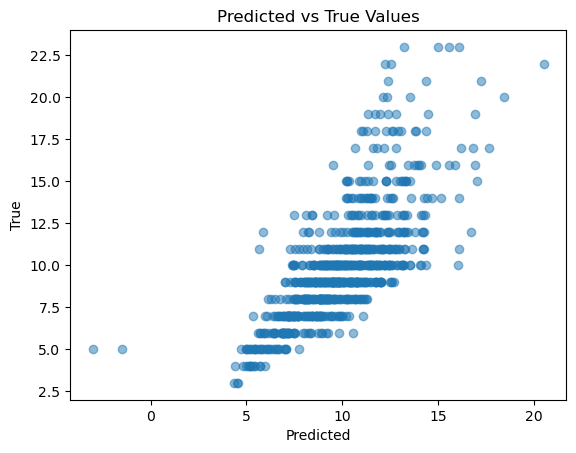

In [4]:
# Problem 2 Solutions:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Part 1: Load data, identify features and target
import os

abalone_path = 'data/abalone.csv'
if not os.path.exists(abalone_path):
    import urllib.request
    os.makedirs('data', exist_ok=True)
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
    # The dataset does not have headers, so we add them
    headers = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
    urllib.request.urlretrieve(url, abalone_path)
    # Add headers to the file
    df_temp = pd.read_csv(abalone_path, header=None, names=headers)
    df_temp.to_csv(abalone_path, index=False)

problem2_df = pd.read_csv(abalone_path)
problem2_features = [col for col in problem2_df.columns if col != 'Rings']
problem2_target = 'Rings'

# One-hot encode the 'Sex' column
problem2_df_encoded = pd.get_dummies(problem2_df, columns=['Sex'])
X = problem2_df_encoded.drop('Rings', axis=1).values
y = problem2_df_encoded['Rings'].values

# Part 2: Split data
problem2_X_train, problem2_X_test, problem2_y_train, problem2_y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)

# Part 3: Train linear regression
problem2_model = LinearRegression()
problem2_model.fit(problem2_X_train, problem2_y_train)

# Part 4: Evaluate with MAE and plot EDF with confidence bands
problem2_mae = mean_absolute_error(problem2_y_test, problem2_model.predict(problem2_X_test))

# Empirical Distribution Function (EDF)
errors = problem2_y_test - problem2_model.predict(problem2_X_test)
sorted_errors = np.sort(errors)
edf = np.arange(1, len(errors) + 1) / len(errors)
plt.step(sorted_errors, edf, where='post', label='EDF')

# 95% confidence bands (Dvoretzky–Kiefer–Wolfowitz inequality)
n = len(errors)
epsilon = np.sqrt(np.log(2/0.05) / (2*n))
plt.fill_between(sorted_errors, np.maximum(edf - epsilon, 0), np.minimum(edf + epsilon, 1), color='gray', alpha=0.3, label='95% conf. band')
plt.xlabel('Prediction Error')
plt.ylabel('Empirical CDF')
plt.legend()
plt.title('EDF of Prediction Errors with 95% Confidence Bands')
plt.show()

# Part 5: Scatter plot of predicted vs true values
plt.scatter(problem2_model.predict(problem2_X_test), problem2_y_test, alpha=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted vs True Values')
plt.show()

# Part 6: Reasoning about model performance (to be written as text)
# Example: The model's MAE is problem2_mae, which indicates [describe performance]. The scatter plot shows [describe spread, bias, etc.].

## Problem 3: Poisson Regression (Maximum Points: 13)

### Questions:
1. Load the `data/visits_clean.csv` dataset. Decide features and target. [3p]
2. Prepare the dataset and split into train-test sets. [3p]
3. Implement loss function for Poisson Regression. [2p]
4. Train the Poisson Regression model. [2p]
5. Evaluate the model and provide justification for chosen metrics. [3p]


In [11]:
# Problem 3 Solutions:

%pip install scipy
import urllib.request
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
import os

# Part 1: Load data, choose features and target
visits_path = 'data/visits_clean.csv'
if not os.path.exists(visits_path):
    url = "https://raw.githubusercontent.com/ageron/data/main/visits_clean.csv"
    os.makedirs('data', exist_ok=True)
    import urllib.request
    try:
        url = "https://github.com/datascience-intro/1MS041-2024/raw/main/notebooks/data/visits_clean.csv"
        visits_path = "data/visits_clean.csv"
        urllib.request.urlretrieve(url, visits_path)
        print(f"Downloaded {visits_path} from {url}")
    except Exception as e:
        print(f"Could not download {visits_path} from {url}. Please provide the file manually.")
        raise RuntimeError(f"Could not download {visits_path} from {url}. Please provide the file manually.")


problem3_df = pd.read_csv(visits_path, delim_whitespace=True)
problem3_df.columns = problem3_df.columns.str.strip()
print(problem3_df.columns.tolist())  # See the real column names

problem3_target = 'hosp'  # Use 'hosp' as the target variable (number of hospital visits)

X = problem3_df[problem3_features].values
y = problem3_df[problem3_target].values

# Part 2: Split data
problem3_X_train, problem3_X_test, problem3_y_train, problem3_y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)

# Part 3: Poisson Regression implementation
class PoissonRegression:
    def __init__(self):
        self.coeffs = None

    def _neg_log_likelihood(self, coeffs, X, Y):
        # Linear predictor
        eta = np.dot(X, coeffs[1:]) + coeffs[0]
        mu = np.exp(eta)
        # Negative log-likelihood for Poisson
        # Ignore constant log(Y!) term for optimization
        return -np.sum(Y * eta - mu)

    def fit(self, X, Y):
        initial = np.zeros(X.shape[1] + 1)
        result = minimize(self._neg_log_likelihood, initial, args=(X, Y), method='BFGS')
        self.coeffs = result.x

    def predict(self, X):
        eta = np.dot(X, self.coeffs[1:]) + self.coeffs[0]
        return np.exp(eta)

# Part 4: Train the model
problem3_model = PoissonRegression()
problem3_model.fit(problem3_X_train, problem3_y_train)

# Part 5: Evaluate the model (example: mean absolute error)
from sklearn.metrics import mean_absolute_error
y_pred = problem3_model.predict(problem3_X_test)
problem3_mae = mean_absolute_error(problem3_y_test, y_pred)
print("Mean Absolute Error (MAE) on test set:", problem3_mae)
# Justification: MAE is interpretable and robust to outliers for count data.

Note: you may need to restart the kernel to use updated packages.
['ofp', 'ofnp', 'opp', 'opnp', 'emr', 'hosp', 'exclhlth', 'poorhlth', 'numchron', 'adldiff', 'noreast', 'midwest', 'west', 'age', 'male', 'married', 'school', 'faminc', 'employed', 'privins', 'medicaid']


C:\Users\Debashish Sen\AppData\Local\Temp\ipykernel_16520\2673688458.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  problem3_df = pd.read_csv(visits_path, delim_whitespace=True)


Mean Absolute Error (MAE) on test set: 0.3881544915498896


### Final Discussion and Submission

- Ensure all cells are executed.
- Save the notebook before submission.